In [1]:
# Ce premier exercice a pour objectif de vous familariser avec les notebooks, le python
# Les parties en vert sont des commentaire

'''Le problème de Monty Hall

Le problème de Monty Hall est un casse-tête probabiliste librement inspiré du jeu télévisé américain Let's Make a Deal.
Il est simple dans son énoncé, mais non intuitif dans sa résolution. 
Il porte le nom de celui qui a présenté ce jeu aux États-Unis pendant 13 ans, Monty Hall.

Le jeu oppose un présentateur à un joueur. 
Le joueur est placé devant trois portes fermées. 
Derrière l'une d'elles se trouve une voiture et derrière les deux autres une chèvre. 
Le joueur doit tout d'abord désigner une porte. 
Le présentateur sait quelle est la bonne porte dès le début. Il  ouvre une porte qui n'est ni celle choisie par le candidat, ni celle cachant la voiture 
Le candidat a  le droit d'ouvrir la porte qu'il a choisie initialement ou bien la troisième porte.

Quelle est la meilleure stratégie pour le joueur pour gagner la voiture ?'''

# Les parties en rouge sont également des commentaires longs.
# Exécuter les cellules en cliquant sur "Run"


"Le problème de Monty Hall\n\nLe problème de Monty Hall est un casse-tête probabiliste librement inspiré du jeu télévisé américain Let's Make a Deal.\nIl est simple dans son énoncé, mais non intuitif dans sa résolution. \nIl porte le nom de celui qui a présenté ce jeu aux États-Unis pendant 13 ans, Monty Hall.\n\nLe jeu oppose un présentateur à un joueur. \nLe joueur est placé devant trois portes fermées. \nDerrière l'une d'elles se trouve une voiture et derrière les deux autres une chèvre. \nLe joueur doit tout d'abord désigner une porte. \nLe présentateur sait quelle est la bonne porte dès le début. Il  ouvre une porte qui n'est ni celle choisie par le candidat, ni celle cachant la voiture \nLe candidat a  le droit d'ouvrir la porte qu'il a choisie initialement ou bien la troisième porte.\n\nQuelle est la meilleure stratégie pour le joueur pour gagner la voiture ?"

In [2]:
# Dans cette cellule, nous préparons l'environnement de travail du notebook :

# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type prend
# comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [3]:
# Dans cette cellule, nous définissons une sous-classe de Enum, 
# qui listera les 2 stratégies possibles (changer de porte ou la garder)
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    
# QUESTION : Expliquer l'avantage d'utiliser une structure de données de type Enum 
# plutôt qu'un simple booléen ? Penser à chercher dans la documention !

# REPONSE : Une énumération donne une information plus complète qu'un simple "oui ou non"
# et donne la possibilité de rajouter des options de stratégies plus tard

In [6]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()


def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle  retourne  le résultat de la partie (réussie ou non).
    
    Args:
        strategie (Strategie): 1 ou 2
        
    Returns:
        bool: 1 pour gagné, 0 pour perdu
    '''
# Le commentaire en plusieurs lignes après la déclaration du nom de la fonction est un docstring. 
# Par convention, il est utilisé pour générer une documentation. 
# C'est très important de toujours commenter vos fonctions. 
# Un bon commentaire  explique non seulement ce que la fonction fait, mais aussi pourquoi.
# Notez la séparation entre la première ligne du docstring, qui contient une description abrégée, 
# et le reste, qui sert à décrire plus précisément la fonction. Dans la liste des arguments, 
# on peut définir le type attendu entre parenthèses.

# QUESTION : Compléter les commentaires (XXXXXXXXX) relatifs aux arguments de la fonction et à la valeur retournée

# REPONSE :     
#    

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0

    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

# QUESTION : Compléter les arguments des différents appels de la fonction randint.  

# REPONSE : 


In [19]:
# Simulation de plusieurs parties

play_game(Strategie.CHANGER)

# QUESTION : exécuter au moins une dizaine de fois cette cellule. Que constatez vous ?

# REPONSE : On perd 3 fois sur 10 et on gagne 7 fois sur 10 quand on choisit de changer de porte au milieu du jeu

True

In [20]:
# Nous allons définir une fonction qui lancera le jeu autant de fois que nous le souhaitons, 
# et retournera le résultat de chaque partie dans une liste. 
# Pour pouvoir exécuter des calculs sur ces résultats, nous allons aussi les stocker 
# non plus comme des variables booléennes (Vrai ou Faux) 
# mais en terme du gain du joueur (1 s'il a gagné, 0 s'il a perdu).

def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de nb_tours parties
    du jeu sous forme d'une liste de gains par le joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: liste des resultats de chaque partie, de taille nb_tours
    '''
    
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

# QUESTION : Que retourne cette fonction ?

# REPONSE : Elle retourne la liste des résultats pour chaque partie avec la stratégie donnée en paramètre, 
# cette liste est de taille nb_tours

In [23]:
# QUESTION : Compléter le code ci-dessous pour calculer combien de fois le joueur à gagné sur 10 000 parties ?
liChanger=play(Strategie.CHANGER,10000)
cptchanger=0
for i in range (len(liChanger)):
    if liChanger[i]==1:
        cptchanger+=1
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(cptchanger))

liGarder=play(Strategie.GARDER,10000)
cptgarder=0
for i in range (len(liGarder)):
    if liGarder[i]==1:
        cptgarder+=1      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(cptgarder))

# REPONSE : en changeant : 6562/10000
# en gardant : 3381/10000

En changeant de porte, le joueur a gagné 6563 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3381 sur 10000 parties.


In [ ]:
# Le joueur qui a changé de porte a donc gagné approximativement deux fois plus souvent 
# que le joueur qui a conservé son choix initial. Vous y attendiez-vous ?

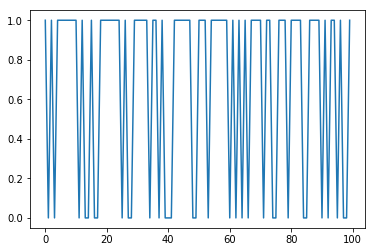

In [34]:
# Visualisation
# Il n'est pas possible de regarder les 10000 parties une par une, mais heureusement, 
# nous pouvons créer des graphiques grâce à Matplotlib. 
# Commençons par tester la fonction plot.

# plot renvoie un objet, que l'on pourra manipuler plus tard pour personnaliser le graphique
plot = plt.plot(play(Strategie.CHANGER, 100))

# QUESTION : Que représente ce graphique ? 
# Essayez avec 10000 parties.
# En quoi pose t'il problème ? 

# REPONSE : Ce graphique représente les résultats de la liste sous forme de grahique qui relie les parties par un 
# trait entre 0 et un. Quand on fait ce graphique pour 10000 parties on a un carré bleu car la forme du graphique 
# colle tous les traits bleus car ils sont trop nombreux et il ne permet pas de visualiser de façon cohérente le 
#phénomène

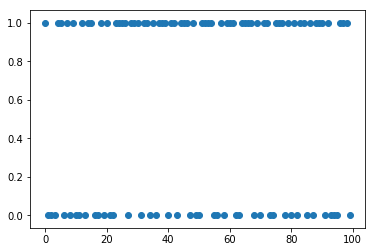

In [26]:
# Testons maintenant la fonction scatter et bar
plot = plt.scatter(range(100), play(Strategie.CHANGER, 100))

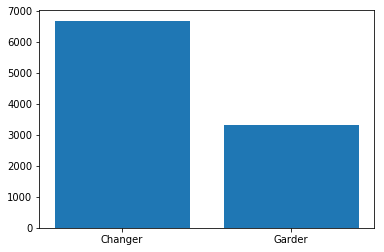

In [27]:
# Testons maintenant la fonction  bar
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

In [ ]:
# QUESTION : Quelle fonction vous parait la plus adaptée.

# REPONSE : La fonction bar paraît clairement plus adaptée pour visualiser la proportion de parties gagnées et 
# celle des parties perdues


In [28]:
# Nous souhaitons maintenant suivre l'évolution des gains des joueurs en fonction du nombre de parties ? 
# Nous pouvons vérifier que notre programme se comporte de manière raisonnable si nous détectons une relation 
# linéaire entre les gains des joueurs et le nombre de parties qu'ils ont joué. 
# Gagne t'on plus avec la stratégie CHANGER ou GARDER ?

gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    
# Nous avons maintenant deux listes. 
# L'une contenant les gains d'un joueur qui change de porte systématiquement après 
# 1000, 10000, 20000, 50000, 80000 et 100000 parties. 
# L'autre contient la même chose, mais pour un joueur qui ne change jamais de porte. 


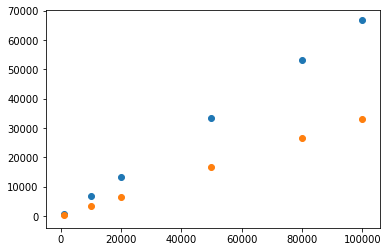

In [37]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(i) for i in gains_changer])
plot = plt.scatter(samples, [sum(i) for i in gains_garder])

# Notez la fonction figure. Elle crée un graphique. 
# Les appels suivants aux fonctions telles que  scatter  et  plot  génèrent des courbes sur ce même graphique.

# QUESTION : modifier le code précédent pour que, sur le même graphique, apparaissent  deux courbes 
# correspondant à ces listes  

# REPONSE : 


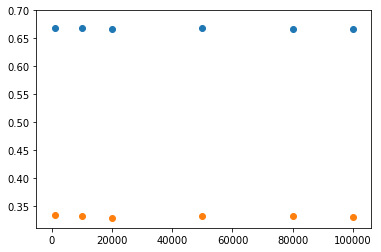

In [42]:
# Regardons une autre donnée, la moyenne de gains de chaque stratégie par partie. 
# Il suffit pour cela de diviser la somme des gains par le nombre de parties. 

# QUESTION : Créer ce graphique et interpréter le 


figure = plt.figure()
plot = plt.scatter(samples, [sum(i)/len(i) for i in gains_changer])
plot = plt.scatter(samples, [sum(i)/len(i) for i in gains_garder])



# REPONSE :